# Boosting

In [17]:
## imports ##
import numpy as np
import pandas as pd
from typing import Dict, Any, List
from sklearn.base import clone
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import StratifiedKFold,cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,make_scorer

In [18]:
## boosting regressor ##
class BoostingRegressor(object):
    #initializer
    def __init__(self, weak_learner : Any, n_elements : int = 100, learning_rate : float = 0.01) -> None:
        self.weak_learner  = weak_learner
        self.n_elements    = n_elements
        self.learning_rate = learning_rate
        self.f             = []
        self.residuals     = []
        
    #destructor
    def __del__(self) -> None:
        del self.weak_learner
        del self.n_elements
        del self.learning_rate
        del self.f
        del self.residuals
    
    #public function to return model parameters
    def get_params(self, deep : bool = False) -> Dict:
        return {'weak_learner':self.weak_learner,'n_elements':self.n_elements,'learning_rate':self.learning_rate}
        #public function to train the ensemble
    def fit(self, X_train : np.array, y_train : np.array) -> None:
        #initialize residuals
        r = np.copy(y_train).astype(float)
        #loop through the specified number of iterations in the ensemble
        for _ in range(self.n_elements):
            #make a copy of the weak learner
            model = clone(self.weak_learner)
            #fit the weak learner on the current dataset
            model.fit(X_train,r)
            #update the residuals
            r -= self.learning_rate*model.predict(X_train)
            #append resulting model
            self.f.append(model)
            #append current mean residual
            self.residuals.append(np.mean(r))    
            
    #public function to return residuals
    def get_residuals(self) -> List:
        return(self.residuals)
    
    #public function to generate predictions
    def predict(self, X_test : np.array) -> np.array:
        #initialize output
        y_pred = np.zeros((X_test.shape[0]))
        #traverse ensemble to generate predictions
        for model in self.f:
            y_pred += self.learning_rate*model.predict(X_test)
        #return predictions
        return(y_pred)

### Data

In [19]:
data=pd.read_csv('data_mais.csv')

In [20]:
X = data.iloc[:, 1:38]
y = data.iloc[:, 38]

In [23]:
## initialize a weak learner ##
weak_m = RandomForestRegressor(max_depth=1)
## set the learning rates to try ##
learning_rates = [0.1,0.3,0.2]

In [24]:
## loop through the learning rates, record residuals ##
dfRes = pd.DataFrame()
for lr in learning_rates:

    #declare a boosting regressor
    rgr = BoostingRegressor(weak_learner=weak_m, n_elements=1000, learning_rate=lr)
    
    #fit the model
    rgr.fit(X,y)
    
    #record residuals
    dfRes[str(lr)] = rgr.get_residuals()

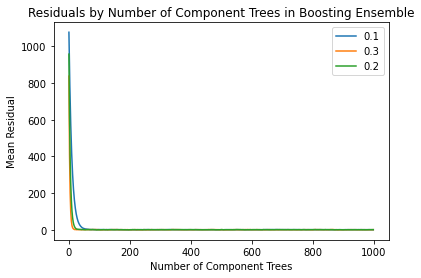

In [25]:
## plot the residuals ##
dfRes.plot()
plt.title('Residuals by Number of Component Trees in Boosting Ensemble')
plt.xlabel('Number of Component Trees')
plt.ylabel('Mean Residual')
plt.show()

In [26]:
## define the scoring metrics ##
scoring_metrics = {'mae': make_scorer(mean_absolute_error), 
                   'mse': make_scorer(mean_squared_error),
                   'r2': make_scorer(r2_score)}
## loop through each learning rate & evaluate for n_elements=1000 ##
for lr in learning_rates:
    #define the model
    rgr = BoostingRegressor(weak_learner=weak_m, n_elements=1000, learning_rate=lr)
    #cross validate
    dcScores = cross_validate(rgr,X,y,cv=10,scoring=scoring_metrics)
    #report results
    print('Learning Rate: ',lr)
    print('Mean MAE: %.2f' % np.mean(dcScores['test_mae']))
    print('Mean MSE: %.2f' % np.mean(dcScores['test_mse']))
    print('Mean R2: %.2f' % np.mean(dcScores['test_r2']))
    print('')

Learning Rate:  0.1
Mean MAE: 300.29
Mean MSE: 157256.42
Mean R2: 0.44

Learning Rate:  0.3
Mean MAE: 318.62
Mean MSE: 174988.31
Mean R2: 0.37

Learning Rate:  0.2
Mean MAE: 310.70
Mean MSE: 166927.72
Mean R2: 0.40



In [28]:
100*550

55000